<a href="https://colab.research.google.com/github/NagakrishnaveniPottipati/4575_jenkinsactivity/blob/main/Bharathintern_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error

import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_csv('/content/AAPL.csv') # Load Dataset

In [4]:
df # Check overall data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [5]:
df.isna().mean() # Checking the null value

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [6]:
df["Date"]=pd.to_datetime(df.Date,dayfirst=True)
df.set_index("Date",inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


In [7]:
df=df.asfreq("d")
df = df.fillna(method  = "bfill")

Text(0, 0.5, 'open price')

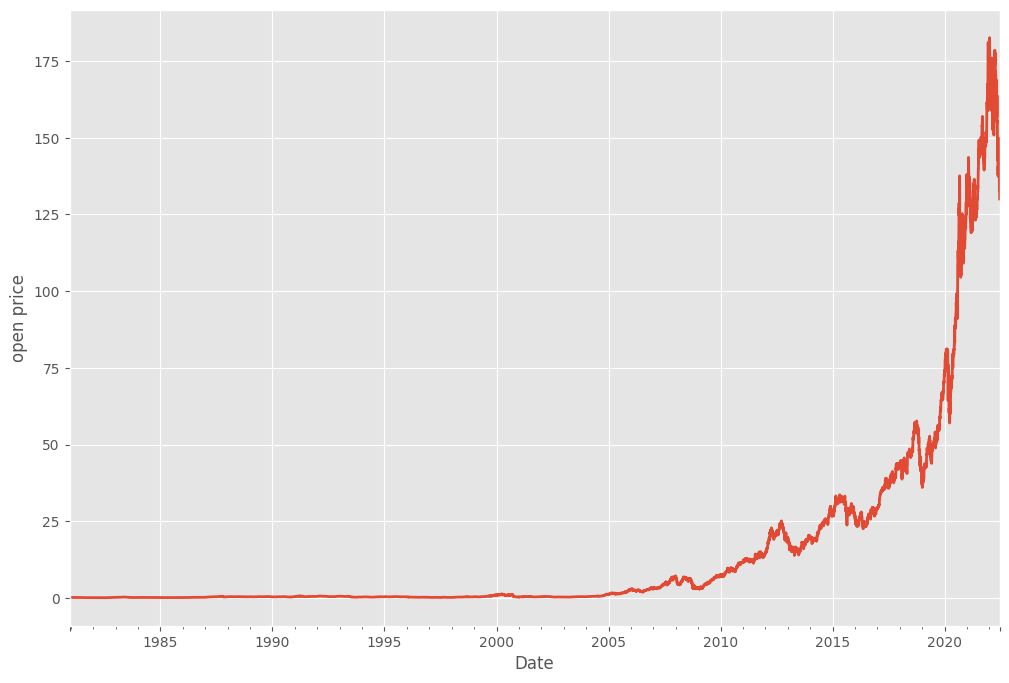

In [8]:
df['Open'].plot(figsize=(12,8))
plt.ylabel("open price")

Text(0, 0.5, 'Volume price')

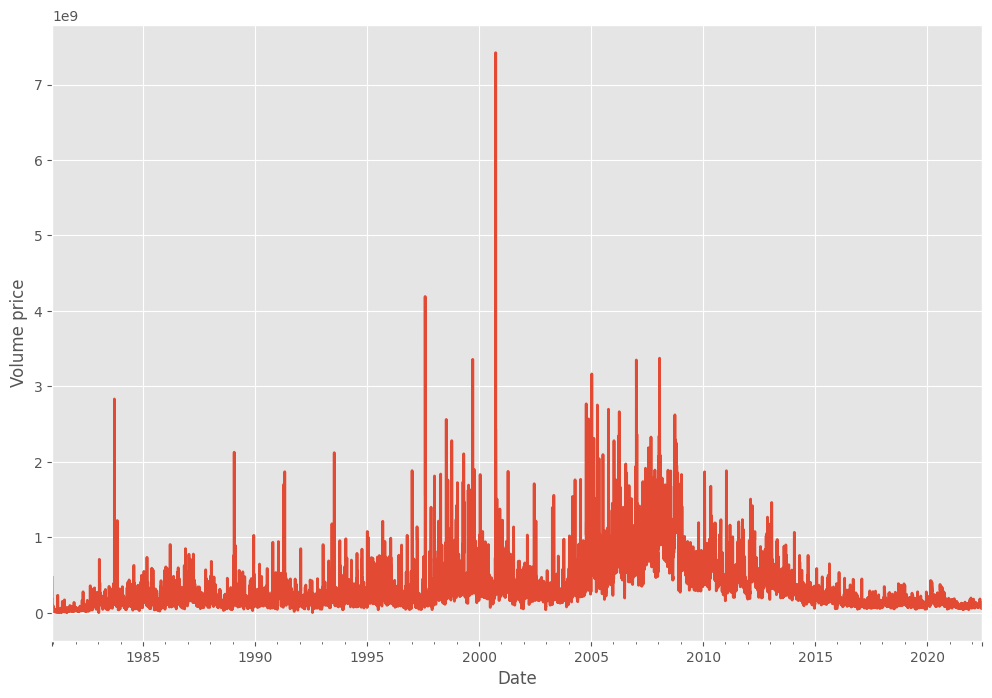

In [9]:
df['Volume'].plot(figsize=(12,8))
plt.ylabel("Volume price")

In [10]:
df['Total Pos'] = df.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

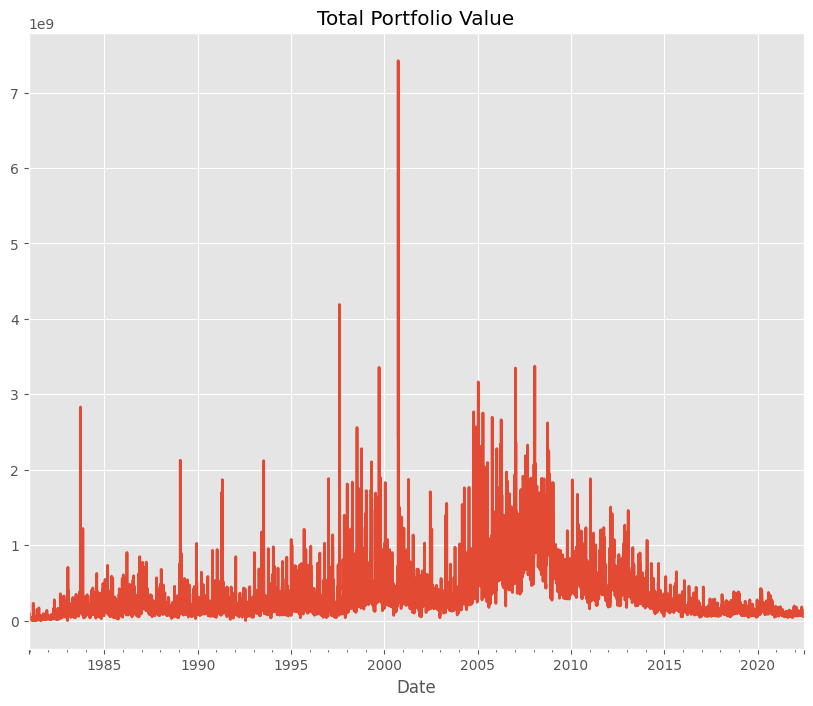

In [11]:
df['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

In [12]:
df['Daily Return'] = df['Total Pos'].pct_change(1)

In [13]:
df['Daily Return'].mean()

8745.781926404048

<Axes: ylabel='Density'>

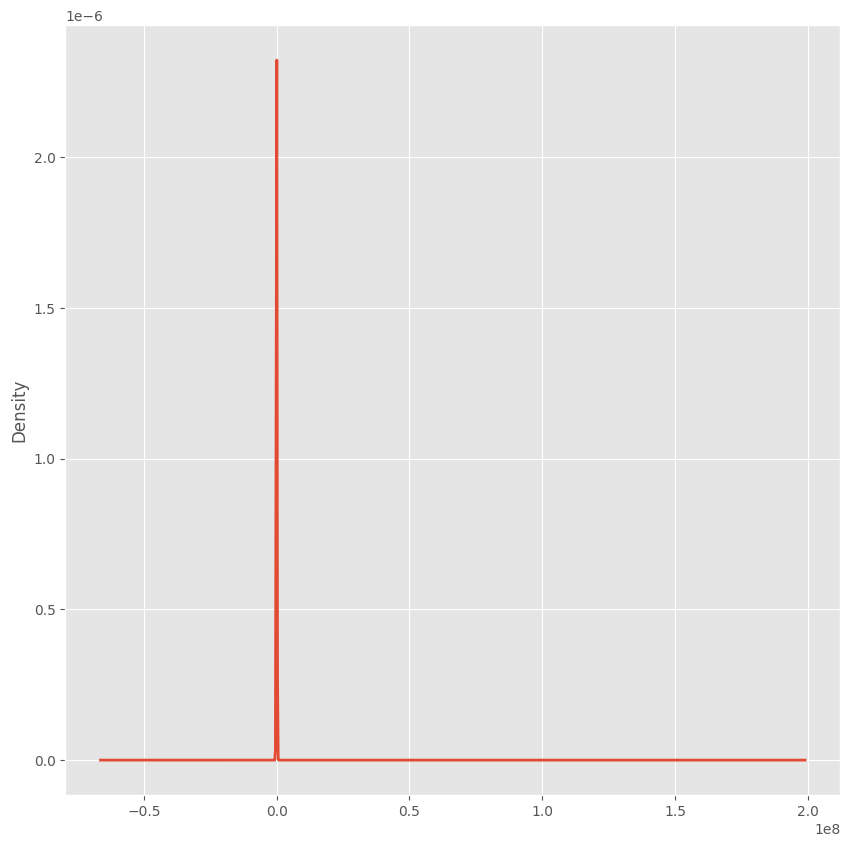

In [14]:
df['Daily Return'].plot(kind='kde')


In [15]:
SR = df['Daily Return'].mean()/df['Daily Return'].std()

<Axes: xlabel='Date'>

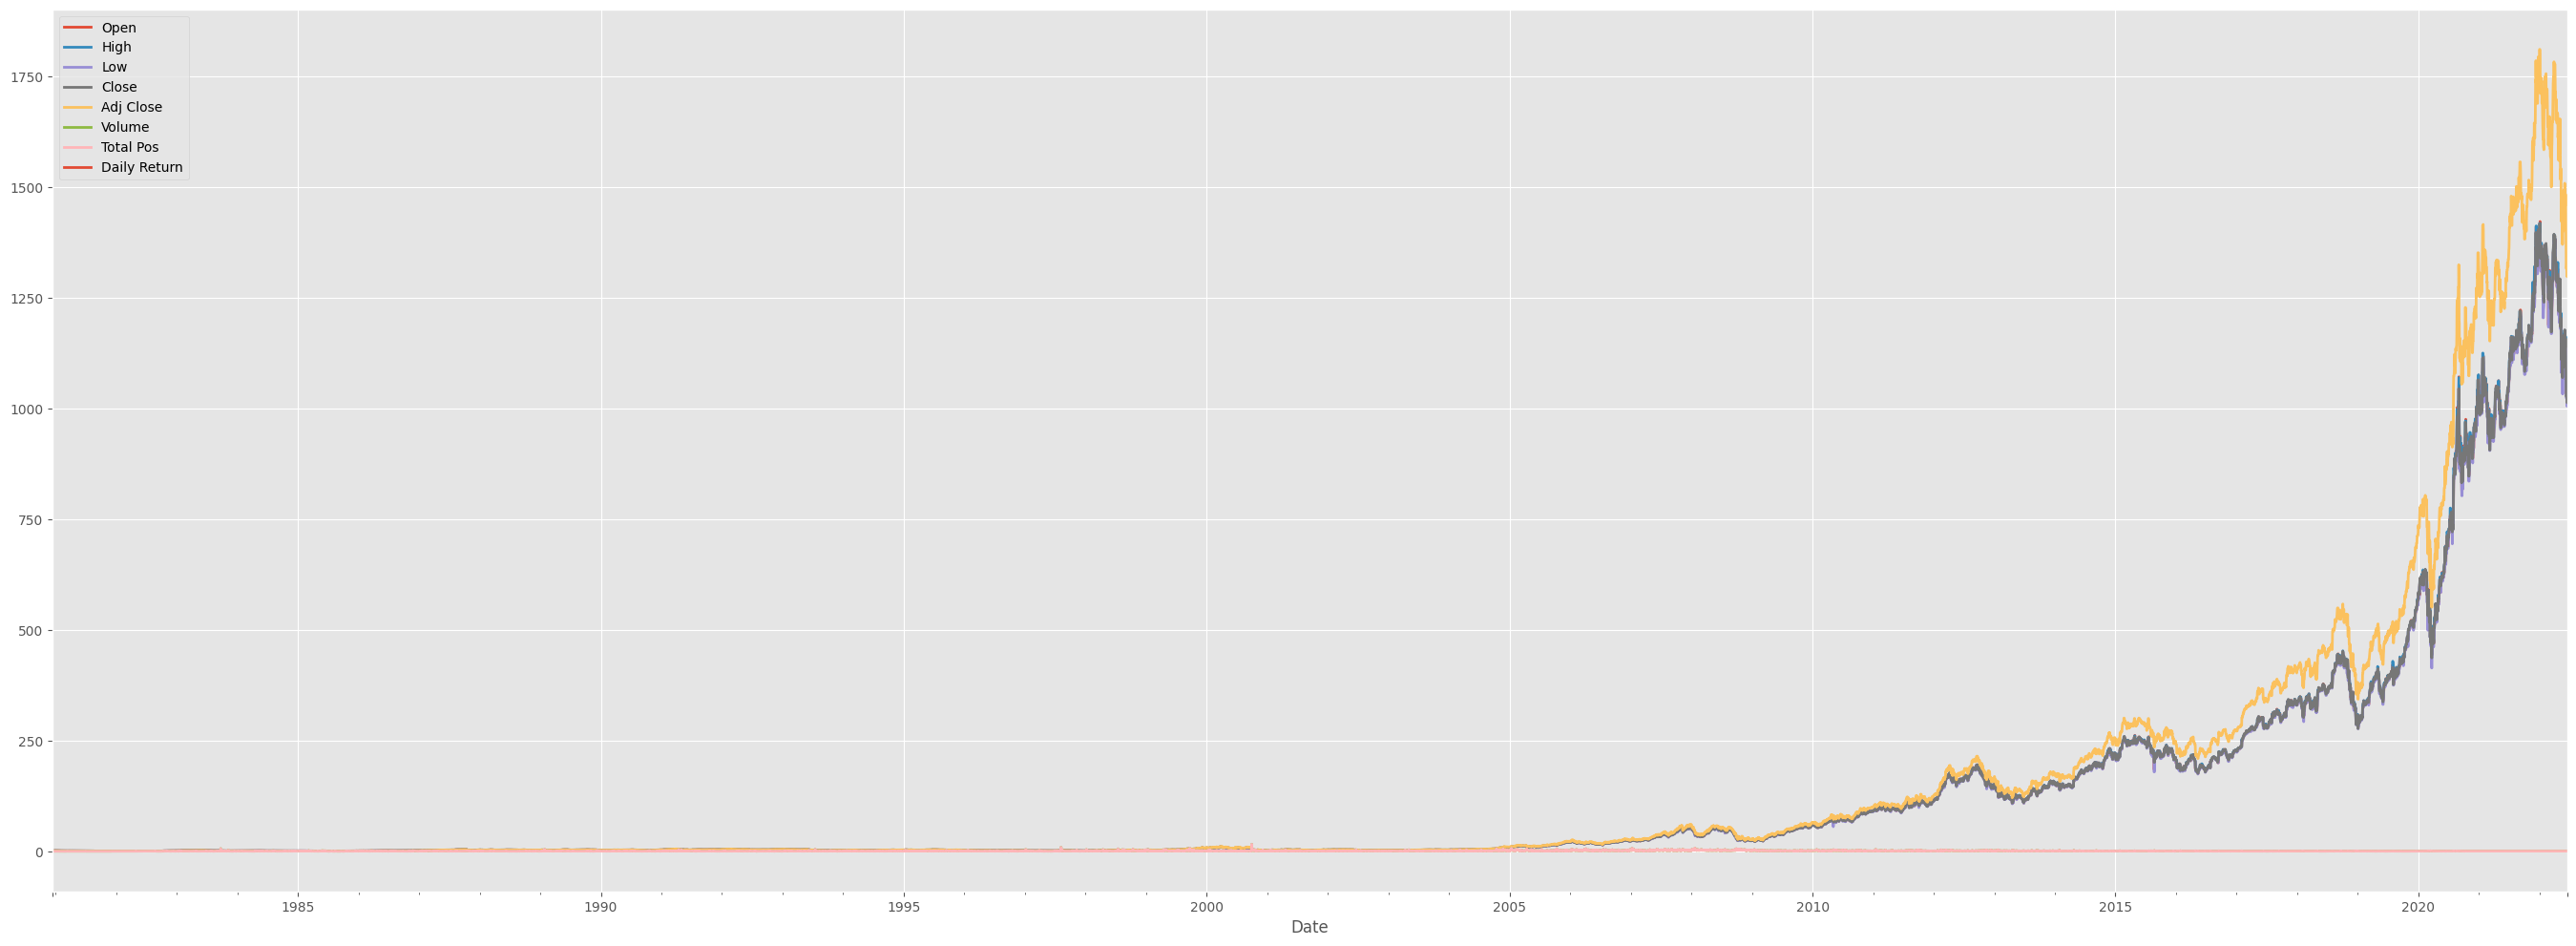

In [16]:
all_plot = df/df.iloc[0]
all_plot.plot(figsize=(34,12))

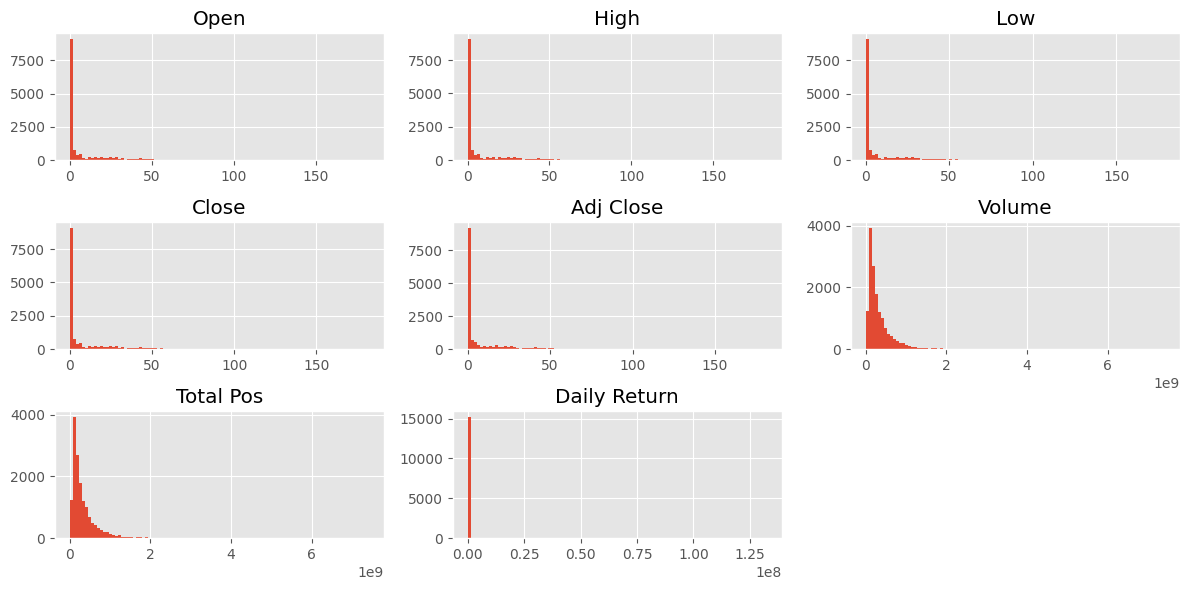

In [17]:
df.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [18]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
1980-12-31,0.137890,0.138281,0.137723,0.137723,0.107496,1.006622e+08,1.006622e+08,-0.081828
1981-12-31,0.108939,0.109297,0.108585,0.108585,0.084753,3.219831e+07,3.219831e+07,363293.775812
1982-12-31,0.085491,0.086622,0.084597,0.085390,0.066649,7.955891e+07,7.955891e+07,0.100908
1983-12-31,0.167658,0.171274,0.163520,0.167363,0.130631,1.705623e+08,1.705623e+08,0.499909
1984-12-31,0.119775,0.122088,0.117448,0.119555,0.093316,1.614866e+08,1.614866e+08,0.095141
1985-12-31,0.091026,0.091943,0.089874,0.090127,0.070346,1.732520e+08,1.732520e+08,0.120049
1986-12-31,0.144779,0.147176,0.142252,0.144956,0.113142,2.032631e+08,2.032631e+08,0.087721
1987-12-31,0.347221,0.354814,0.338359,0.346320,0.270834,2.285255e+08,2.285255e+08,0.080202
1988-12-31,0.370630,0.376351,0.364757,0.370850,0.292065,1.586265e+08,1.586265e+08,0.098004


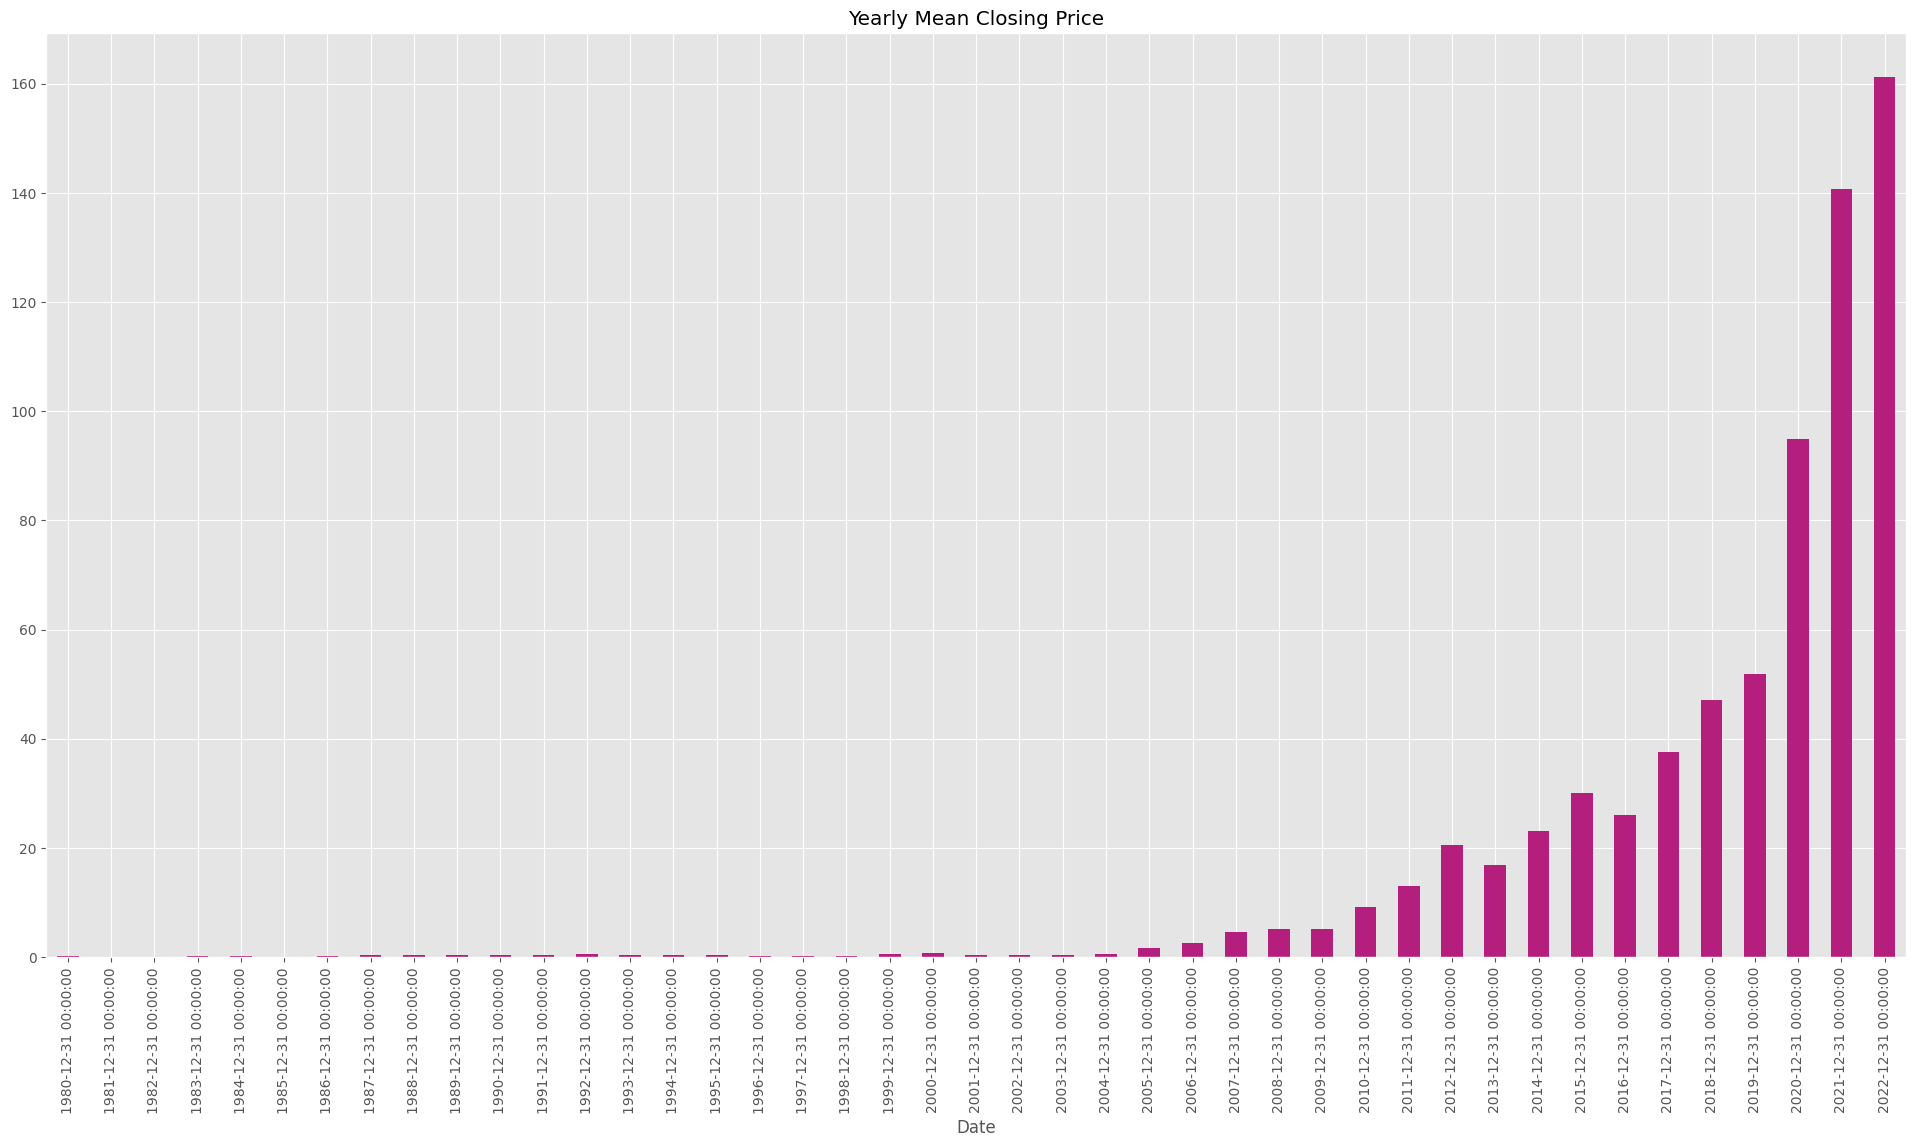

In [19]:
title = 'Yearly Mean Closing Price'
df['Open'].resample('A').mean().plot.bar(title=title,color=['#b41f7d'] , figsize=(24,12));

In [20]:
df['6-month-SMA'] = df['Open'].rolling(window=6).mean()
df['12-month-SMA'] = df['Open'].rolling(window=12).mean()
df['2-month-SMA'] = df['Open'].rolling(window=2).mean()

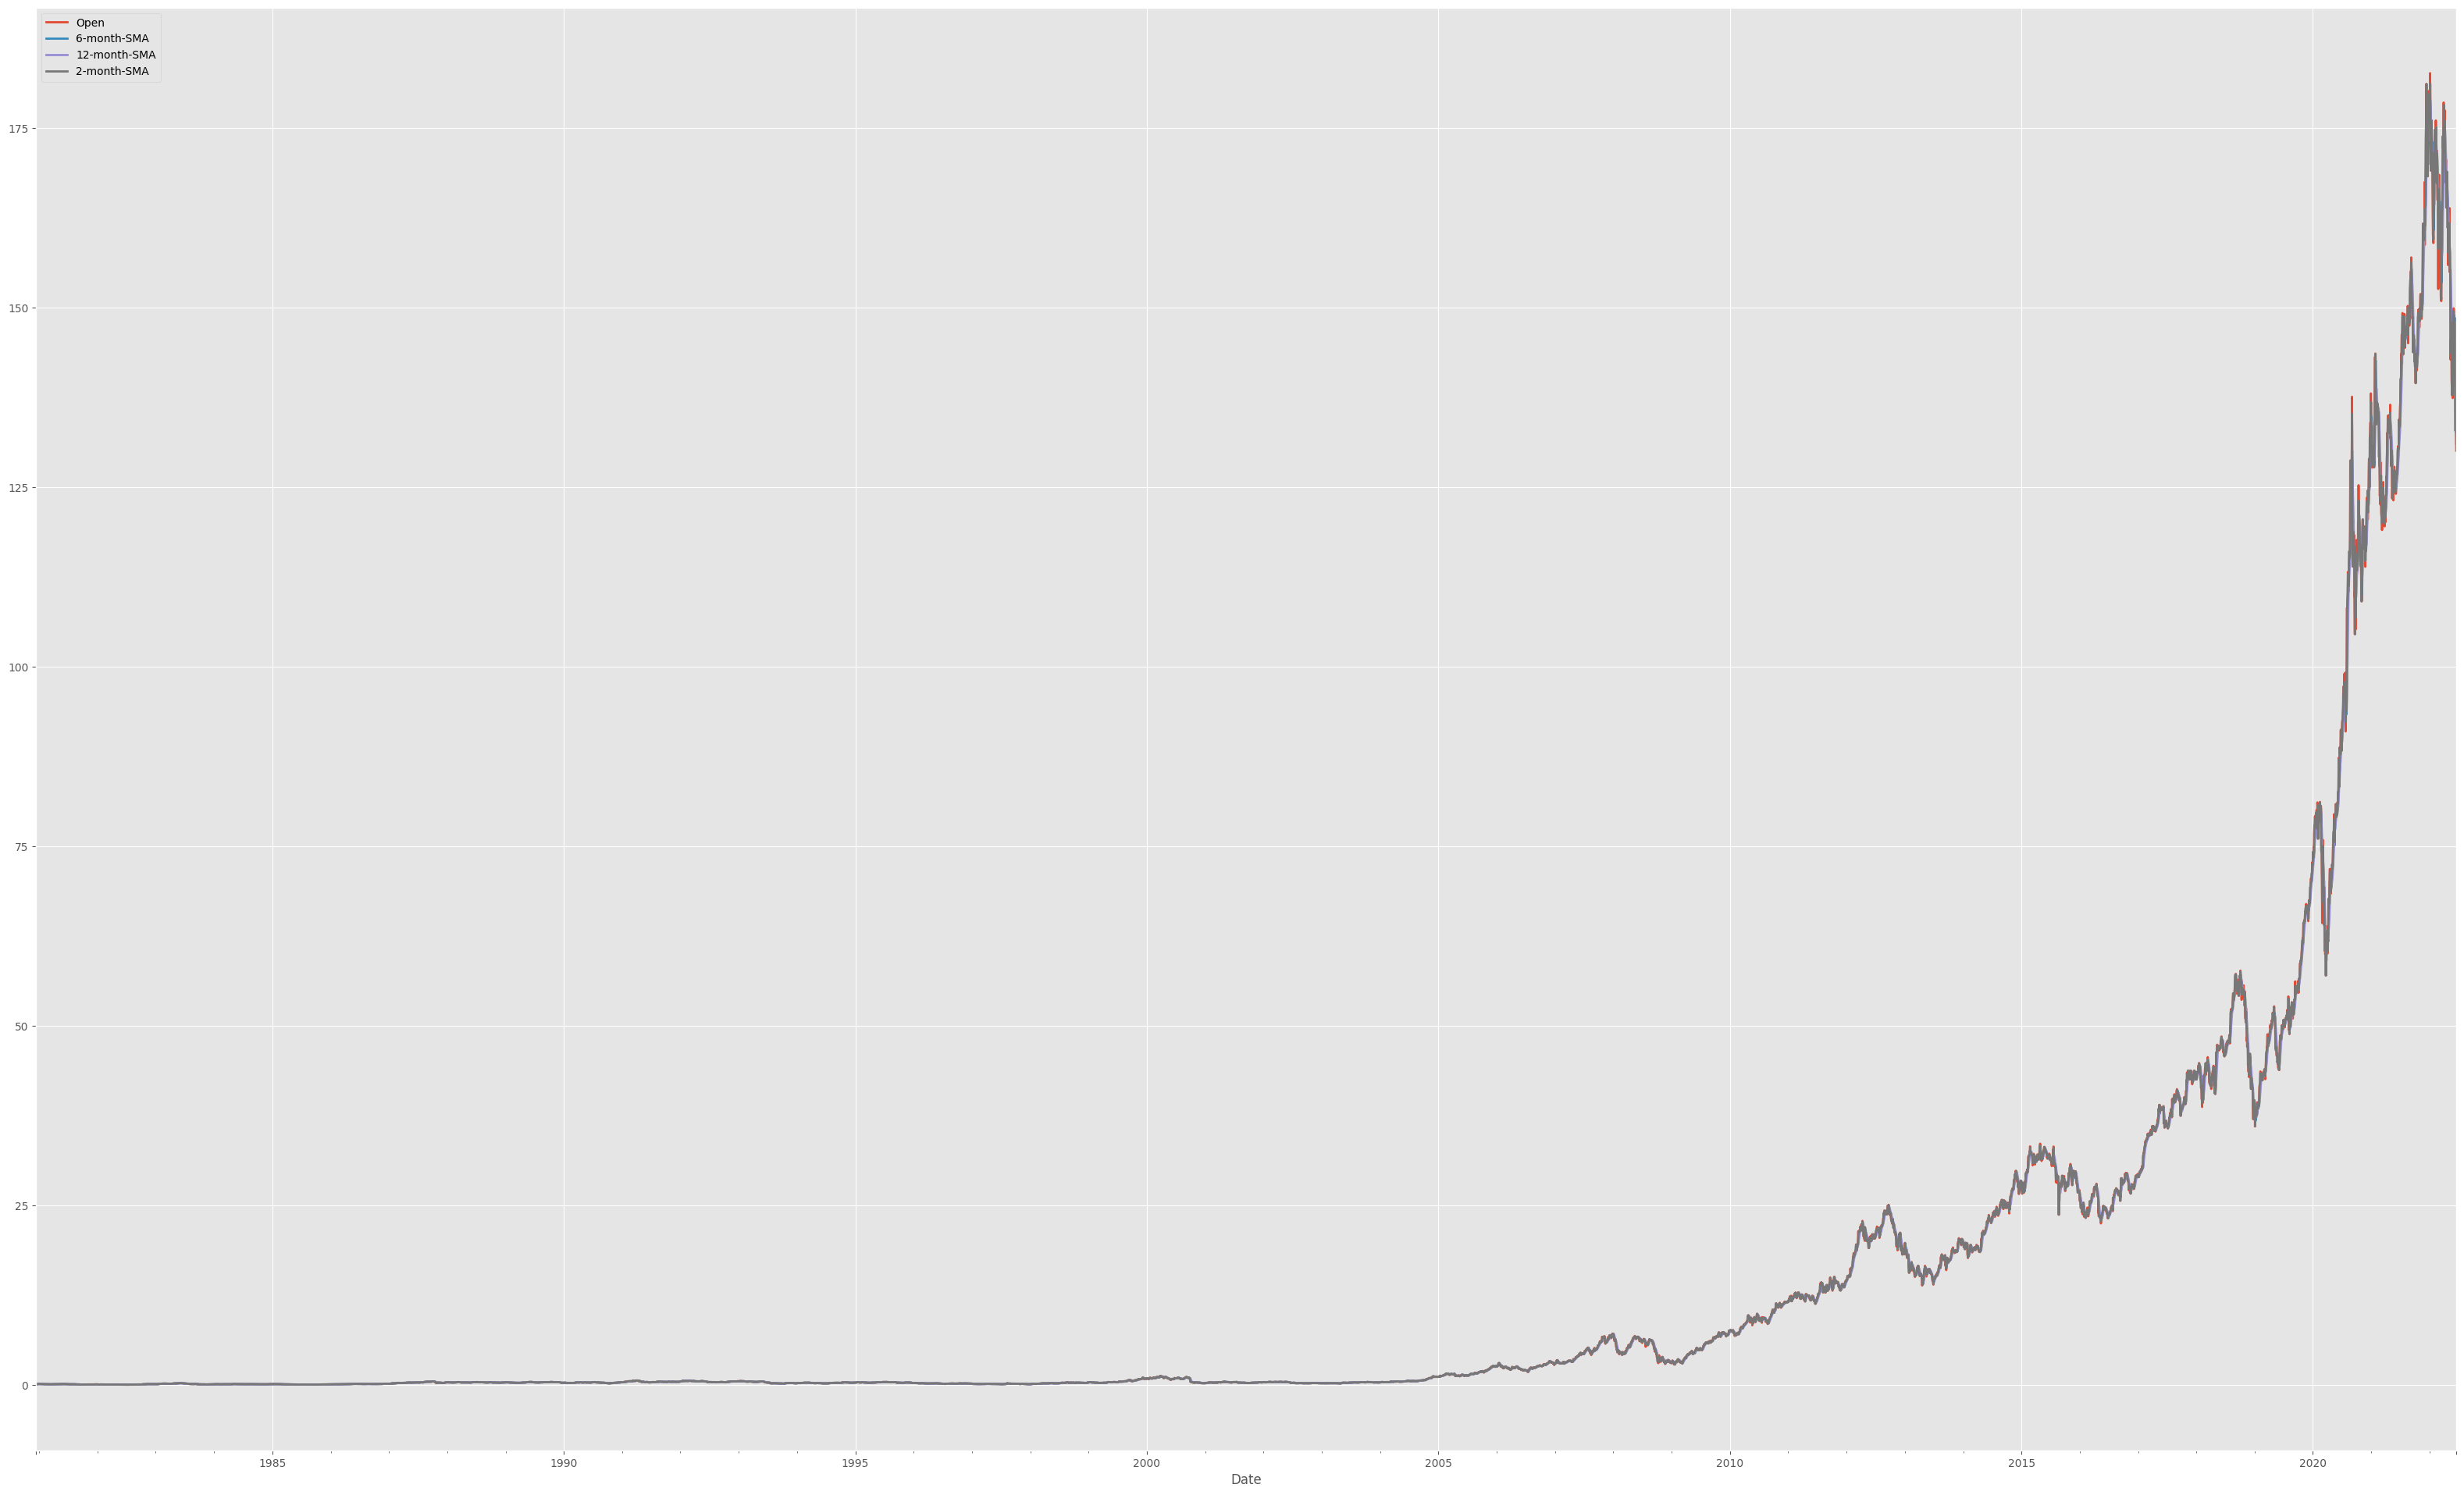

In [21]:
df[["Open","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(40,24));

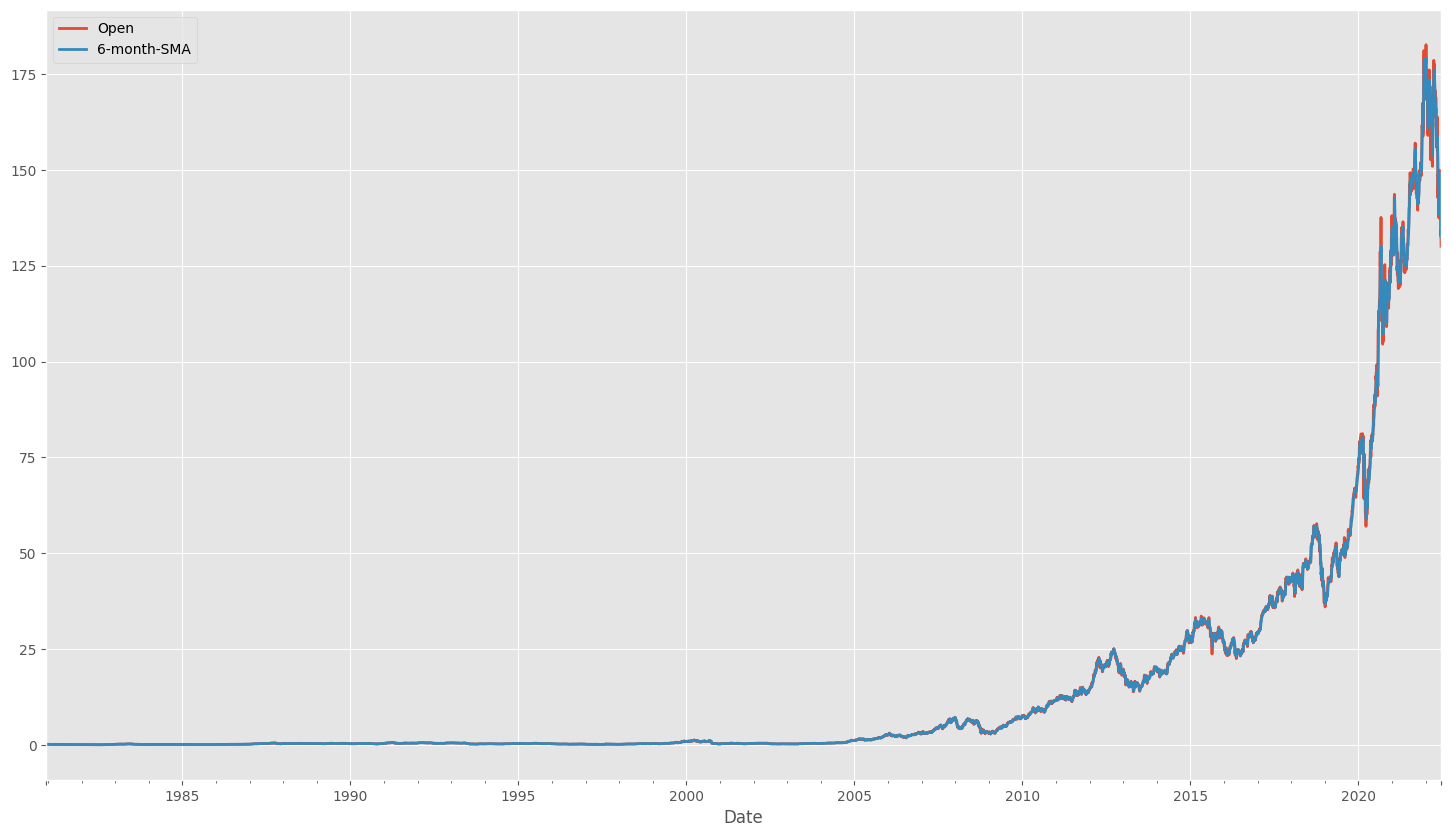

In [22]:
df[["Open","6-month-SMA"]].plot(figsize=(18,10));

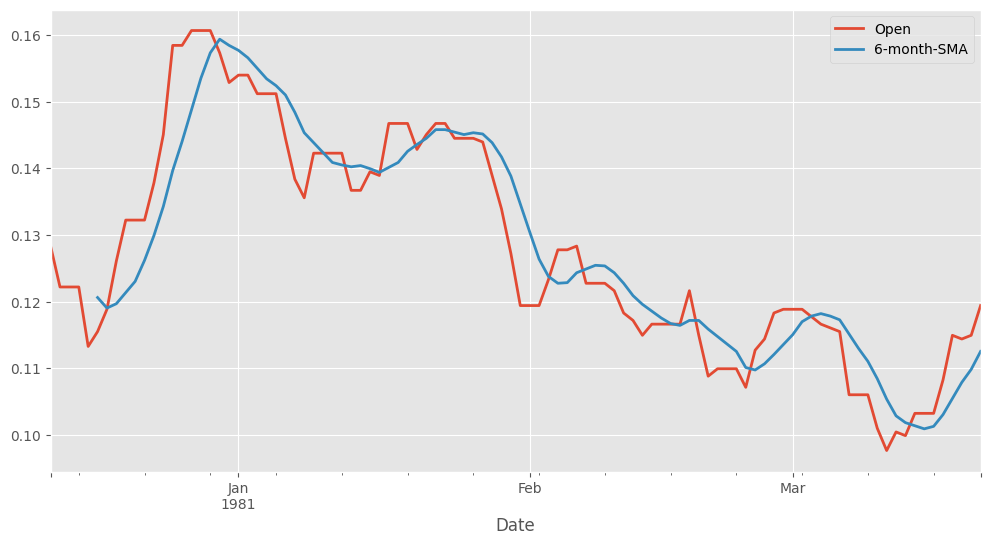

In [23]:
df[['Open','6-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [24]:
df['EWMA12'] = df['Open'].ewm(span=14,adjust=True).mean()

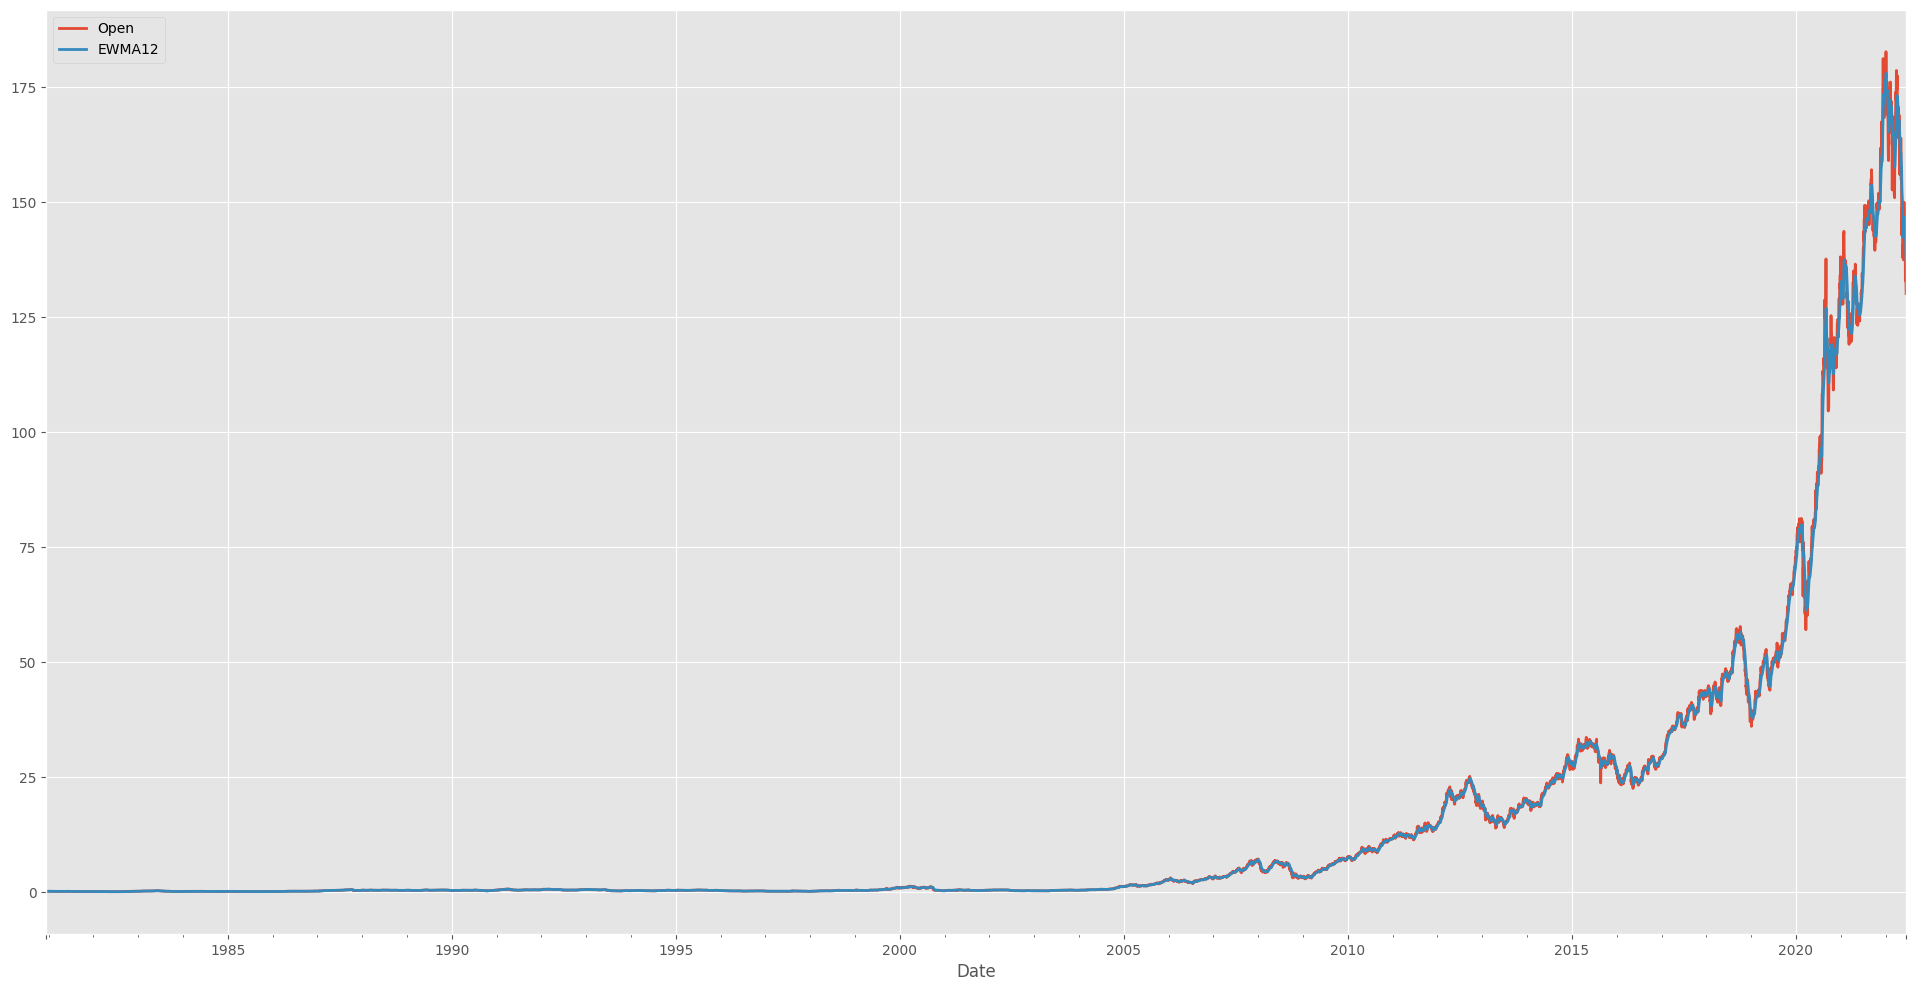

In [25]:
df[['Open','EWMA12']].plot(figsize=(24,12));


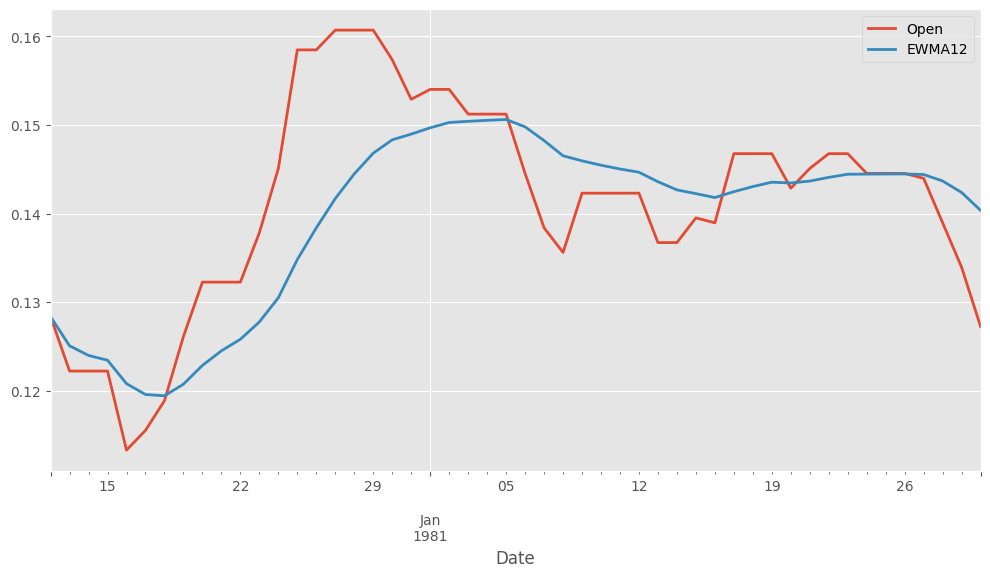

In [26]:
df[['Open','EWMA12']].iloc[:50].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [27]:
df['EWMA12'] = df['Open'].ewm(span=14,adjust=True).mean()

In [28]:
span = 8
alpha = 2/(span+1)

In [29]:
df['EWMA12'] = df['Open'].ewm(alpha=alpha,adjust=False).mean()

In [30]:
model=SimpleExpSmoothing(df["Open"])

In [31]:
model.fit(smoothing_level=alpha,optimized=False)

In [32]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [33]:
fitted_model.fittedvalues

Date
1980-12-12      0.128348
1980-12-13      0.128348
1980-12-14      0.126984
1980-12-15      0.125923
1980-12-16      0.125098
                 ...    
2022-06-13    140.496869
2022-06-14    138.802008
2022-06-15    137.541563
2022-06-16    136.818992
2022-06-17    135.765883
Freq: D, Length: 15163, dtype: float64

In [34]:
fitted_model.fittedvalues.shift(-1)

Date
1980-12-12      0.128348
1980-12-13      0.126984
1980-12-14      0.125923
1980-12-15      0.125098
1980-12-16      0.122472
                 ...    
2022-06-13    138.802008
2022-06-14    137.541563
2022-06-15    136.818992
2022-06-16    135.765883
2022-06-17           NaN
Freq: D, Length: 15163, dtype: float64

In [35]:
df["SES12"]=fitted_model.fittedvalues.shift(-1)

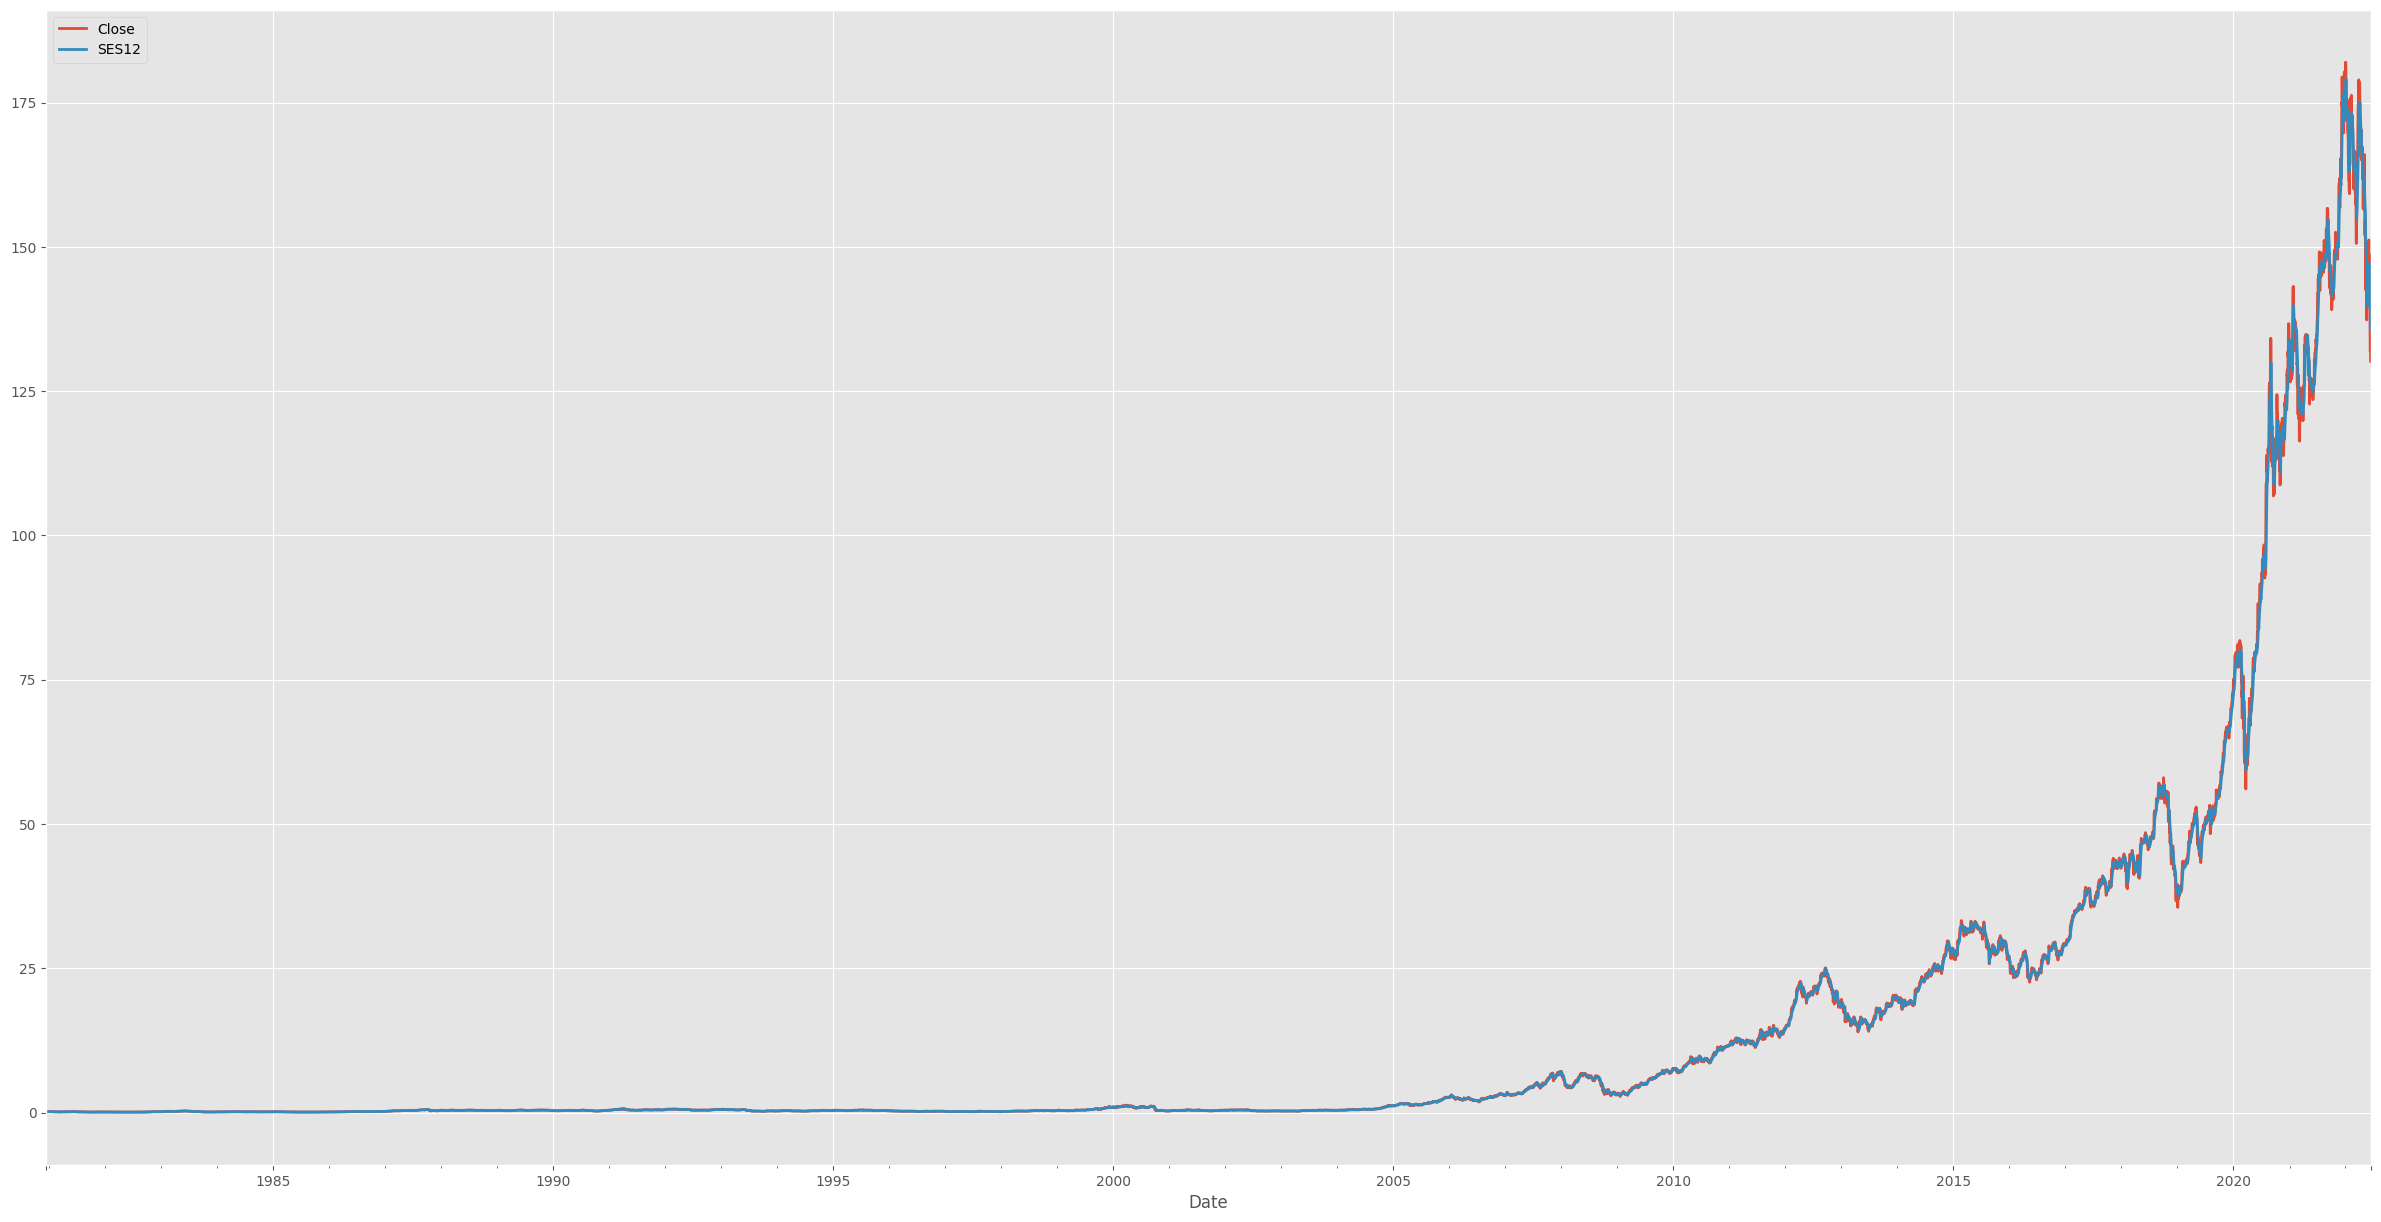

In [36]:
df[['Close',"SES12"]].plot(figsize=(30,15)).autoscale(axis='x',tight=True);

In [37]:
df['DESadd12'] = ExponentialSmoothing(df['Open'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12
Date,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128963
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.123067
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122860
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122853
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.114233


<Axes: xlabel='Date'>

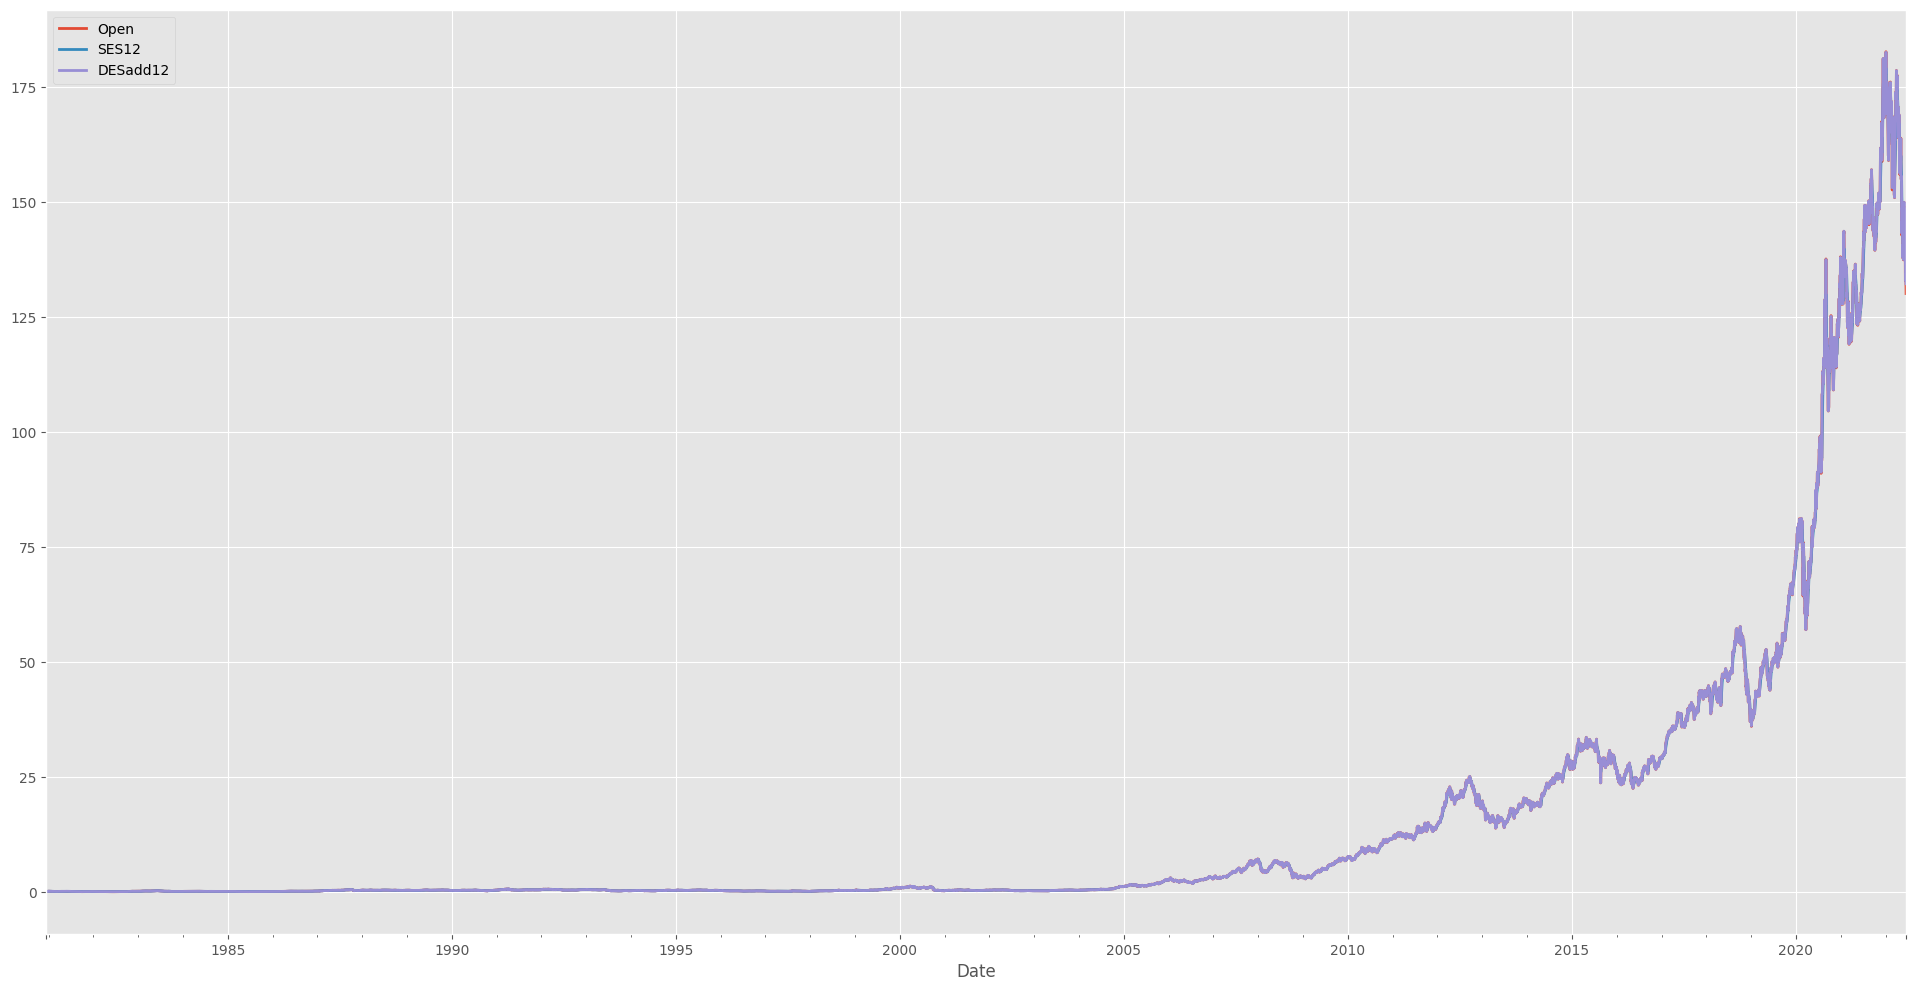

In [38]:
df[['Open',  'SES12', 'DESadd12']].plot(figsize=(24,12))

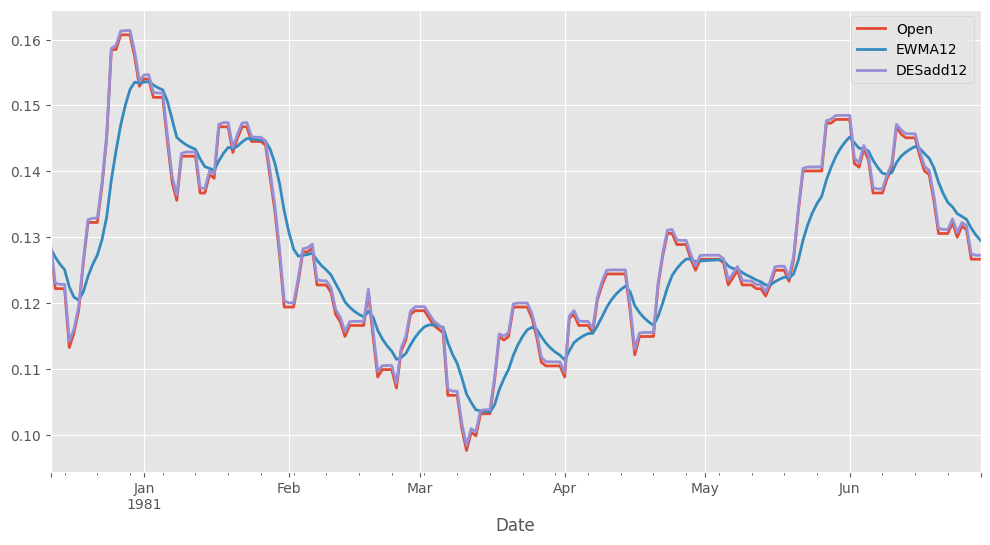

In [39]:
df[['Open','EWMA12','DESadd12']].iloc[:200].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [40]:
df['DESmul12'] = ExponentialSmoothing(df['Open'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128963,0.128682
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.123067,0.122479
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122860,0.122255
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122853,0.122247
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.114233,0.113637


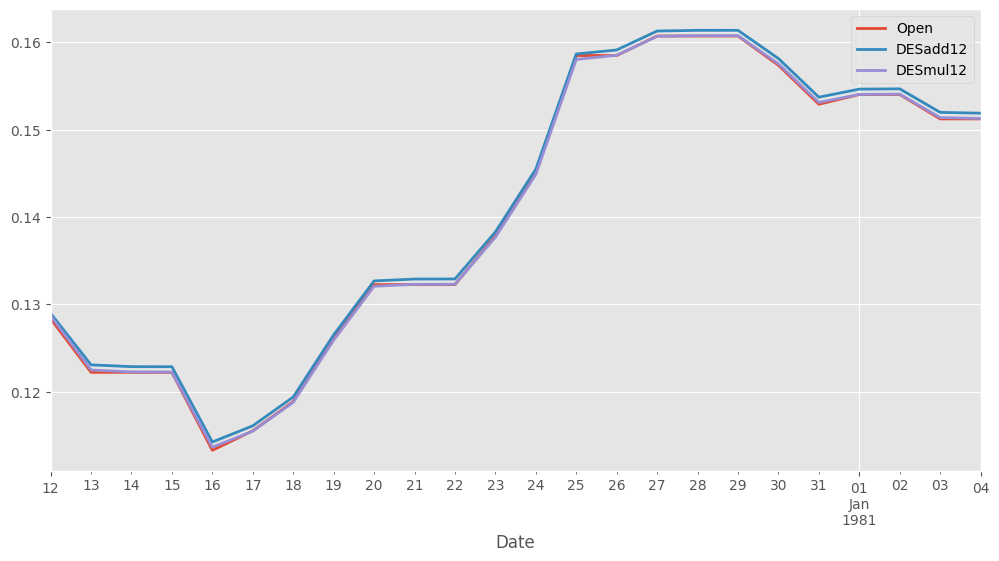

In [41]:
df[['Open','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [42]:
df['TESadd12'] = ExponentialSmoothing(df['Open'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128963,0.128682,0.128033
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.123067,0.122479,0.126671
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122860,0.122255,0.120262
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122853,0.122247,0.125953
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.114233,0.113637,0.133616


In [43]:
df['TESmul12'] = ExponentialSmoothing(df['Open'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128963,0.128682,0.128033,0.013778
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.123067,0.122479,0.126671,0.119285
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122860,0.122255,0.120262,0.004089
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122853,0.122247,0.125953,0.091705
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.114233,0.113637,0.133616,0.032735


In [44]:
df['TESmul12'] = ExponentialSmoothing(df['Open'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,4.690336e+08,NaN,NaN,NaN,NaN,0.128348,0.128348,0.128963,0.128682,0.128033,0.013778
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,-0.625006,NaN,NaN,0.125279,0.126984,0.126984,0.123067,0.122479,0.126671,0.119285
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125923,0.125923,0.122860,0.122255,0.120262,0.004089
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,1.758848e+08,0.000000,NaN,NaN,0.122210,0.125098,0.125098,0.122853,0.122247,0.125953,0.091705
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,1.057280e+08,-0.398879,NaN,NaN,0.117746,0.122472,0.122472,0.114233,0.113637,0.133616,0.032735


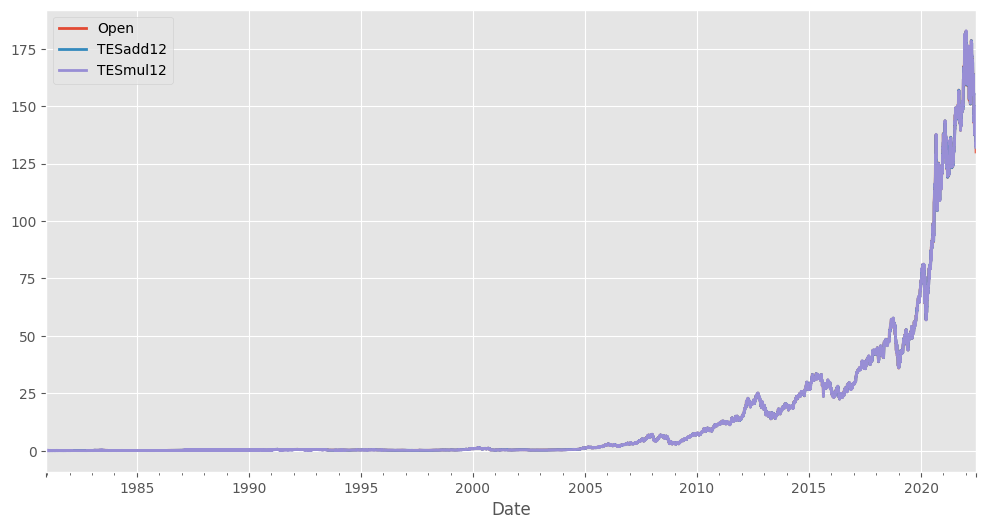

In [45]:
df[['Open','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

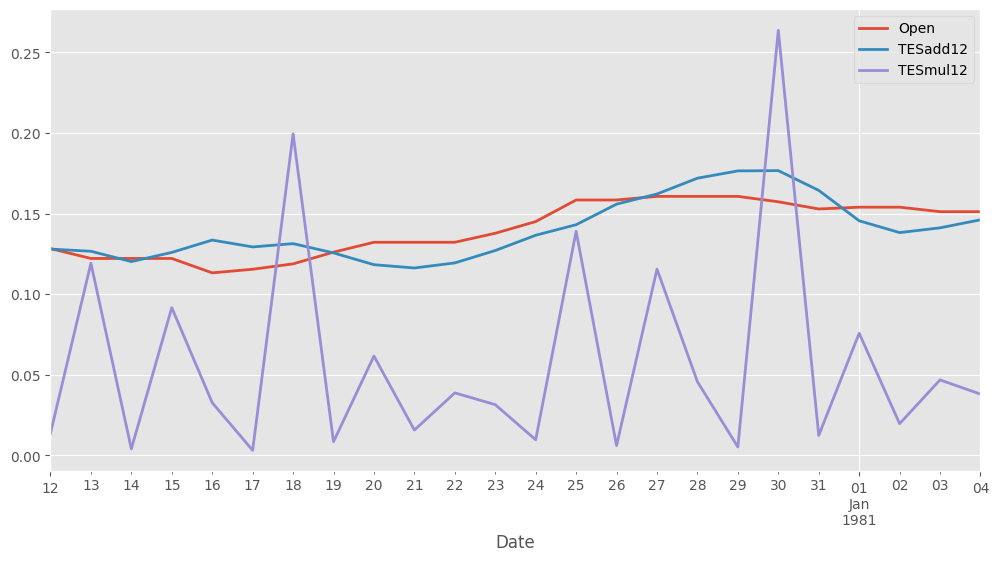

In [46]:
df[['Open','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [47]:
data = df.filter(['Open'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

14405

In [48]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.97331936e-04],
       ...,
       [7.35239774e-01],
       [7.23135563e-01],
       [7.12126738e-01]])

In [49]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00043095, 0.00039733, 0.00039733, 0.00039733, 0.00034843,
       0.00036065, 0.00037899, 0.00041873, 0.00045234, 0.00045234,
       0.00045234, 0.00048291, 0.00052264, 0.000596  , 0.000596  ,
       0.00060822, 0.00060822, 0.00060822, 0.00058988, 0.00056543,
       0.00057155, 0.00057155, 0.00055626, 0.00055626, 0.00055626,
       0.00051958, 0.00048597, 0.00047069, 0.00050736, 0.00050736,
       0.00050736, 0.00050736, 0.0004768 , 0.0004768 , 0.00049208,
       0.00048902, 0.00053181, 0.00053181, 0.00053181, 0.00051042,
       0.00052264, 0.00053181, 0.00053181, 0.00051958, 0.00051958,
       0.00051958, 0.00051653, 0.00048902, 0.00046152, 0.00042484,
       0.00038205, 0.00038205, 0.00038205, 0.00040344, 0.00042789,
       0.00042789, 0.00043095, 0.00040039, 0.00040039, 0.00040039])]
[0.0003942757473230688]

[array([0.00043095, 0.00039733, 0.00039733, 0.00039733, 0.00034843,
       0.00036065, 0.00037899, 0.00041873, 0.00045234, 0.00045234,
       0.00045234, 0.00048291, 0.

In [50]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29857 (116.63 KB)
Trainable params: 29857 (116.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history =model.fit(x_train, y_train,
                        epochs=100,
                        batch_size=32,
                        )

Epoch 1/100
449/449 [==============================] - 37s 72ms/step - loss: 1.1658e-04
Epoch 2/100
449/449 [==============================] - 31s 68ms/step - loss: 1.4917e-05
Epoch 3/100
449/449 [==============================] - 29s 65ms/step - loss: 1.3432e-05
Epoch 4/100
449/449 [==============================] - 39s 86ms/step - loss: 1.2870e-05
Epoch 5/100
449/449 [==============================] - 30s 67ms/step - loss: 1.1855e-05
Epoch 6/100
449/449 [==============================] - 29s 65ms/step - loss: 9.9492e-06
Epoch 7/100
449/449 [==============================] - 27s 60ms/step - loss: 1.0607e-05
Epoch 8/100
449/449 [==============================] - 27s 59ms/step - loss: 8.2928e-06
Epoch 9/100
449/449 [==============================] - 28s 62ms/step - loss: 9.4768e-06
Epoch 10/100
449/449 [==============================] - 27s 60ms/step - loss: 8.8693e-06
Epoch 11/100
449/449 [==============================] - 27s 60ms/step - loss: 8.8050e-06
Epoch 12/100
449/449 [========

In [52]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
print(mean_absolute_error(y_test, predictions))

24/24 [==============================] - 1s 17ms/step
5.169615625817129
4.213686180162254


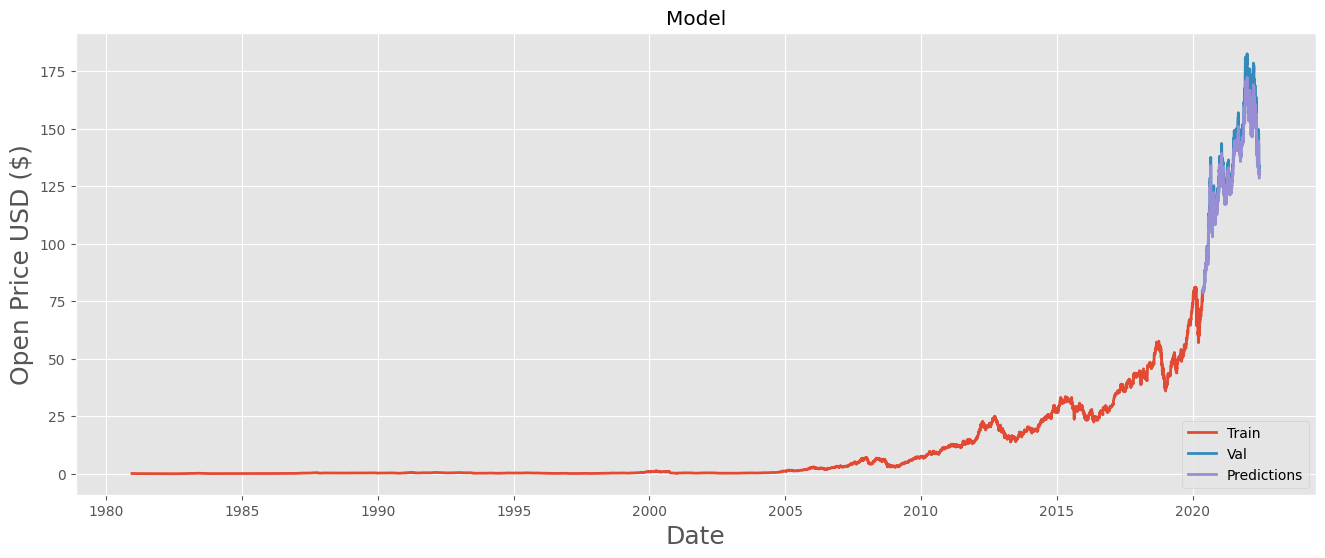

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

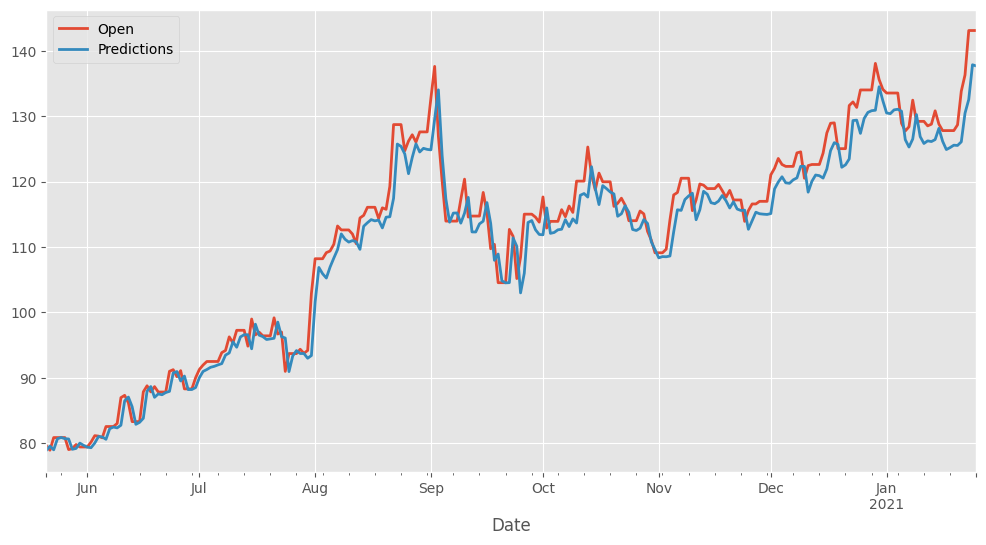

In [54]:
valid[['Open','Predictions']].iloc[:250].plot(figsize=(12,6)).autoscale(axis='x',tight=True);